In [1]:
# importing dependencies 

# !pip install ydata-profiling 
#installing the library

from ydata_profiling import ProfileReport

In [2]:
# Basic libraries
import pymysql
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV


# Other
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

## 0 Goal

The task is to build a model that will **predict the price of a house based on features provided in the dataset**. The senior management also wants to explore the characteristics of the houses using some business intelligence tool. One of those parameters include understanding which factors are responsible for higher property value - $650K and above. The questions have been provided later in the document for which you can use tableau.

## 1 Getting the data

In [3]:
# reading the data
data = pd.read_excel("regression_data.xls")
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [5]:
data.describe().round(1)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0
mean,4.580474e+09,3.4,2.1,2080.3,15099.4,1.5,0.0,0.2,3.4,7.7,1788.6,291.7,1971.0,84.5,98078.0,47.6,-122.2,1986.6,12758.3,540296.6
std,2.876736e+09,0.9,0.8,918.1,41412.6,0.5,0.1,0.8,0.7,1.2,827.8,442.7,29.4,401.8,53.5,0.1,0.1,685.2,27274.4,367368.1
min,1.000102e+06,1.0,0.5,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,0.0,1900.0,0.0,98001.0,47.2,-122.5,399.0,651.0,78000.0
25%,2.123049e+09,3.0,1.8,1430.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.5,-122.3,1490.0,5100.0,322000.0
50%,3.904930e+09,3.0,2.2,1910.0,7618.0,1.5,0.0,0.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98065.0,47.6,-122.2,1840.0,7620.0,450000.0
75%,7.308900e+09,4.0,2.5,2550.0,10685.0,2.0,0.0,0.0,4.0,8.0,2210.0,560.0,1997.0,0.0,98118.0,47.7,-122.1,2360.0,10083.0,645000.0
max,9.900000e+09,33.0,8.0,13540.0,1651359.0,3.5,1.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,47.8,-121.3,6210.0,871200.0,7700000.0


In [6]:
data.shape

(21597, 21)

## 2 Exploration

In [7]:
data['id'].nunique()

21420

**<span style='color:Blue'> There is a gap between the total number of id`s and the unique listed id´s. The gap can be explained by the fact that the houses are sold twice, which makes it unnecessary to keep the 'id' column  </span>**

In [8]:
# Drop 'id' since it is not necessary
data.drop('id', axis=1, inplace=True)
data.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [9]:
data['date'].unique().min()

numpy.datetime64('2014-05-02T00:00:00.000000000')

In [10]:
data['date'].unique().max()

numpy.datetime64('2015-05-27T00:00:00.000000000')

**<span style='color:Blue'> Let´s transform the date  </span>**

In [11]:
data['date_year'] = data['date'].dt.year
data['date_month'] = data['date'].dt.month
data['date_weekday'] = data['date'].dt.day
data.drop(["date"], axis = 1, inplace = True)
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,date_year,date_month,date_weekday
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,2014,10,13
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,2014,12,9
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,2015,2,25
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,2014,12,9
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,2015,2,18


In [12]:
data['bedrooms'].unique().min()

1

In [13]:
data['bedrooms'].unique().max()

33

In [14]:
data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

**<span style='color:Blue'> We have an outlier here with 33 rooms:  </span>**

In [15]:
data['bathrooms'].unique().min()

0.5

In [16]:
data['bathrooms'].unique().max()

8.0

In [17]:
data['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

**<span style='color:Blue'> Not a lot of houses with >4 bathrooms.  </span>**

In [18]:
data['sqft_living'].unique().min()

370

In [19]:
data['sqft_living'].unique().max()

13540

In [20]:
data['sqft_lot'].unique().min()

520

In [21]:
data['sqft_lot'].unique().max()

1651359

In [22]:
data['floors'].unique().min()

1.0

In [23]:
data['floors'].unique().max()

3.5

In [24]:
data['waterfront'].unique()

array([0, 1], dtype=int64)

In [25]:
data['view'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [26]:
data['condition'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [27]:
data['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

In [28]:
data['sqft_above'].unique().min()

370

In [29]:
data['sqft_above'].unique().max()

9410

In [30]:
data['sqft_basement'].unique().min()

0

In [31]:
data['sqft_basement'].unique().max()

4820

In [32]:
data['yr_built'].unique().min()

1900

In [33]:
data['yr_built'].unique().max()

2015

In [34]:
data['yr_renovated'].unique().min()

0

In [35]:
data['yr_renovated'].unique().max()

2015

In [36]:
data['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [37]:
data['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

**<span style='color:Blue'> The first digit represents a group of states or a region of the country. For Seattle, the first digit is always "9", which represents the western region of the United States.
The second and third digits represent a sectional center facility (SCF), which is a regional USPS sorting facility that serves a specific geographic area. In Seattle, the second and third digits range from "80" to "98", and each represents a different SCF.
The fourth and fifth digits represent a delivery area within the SCF. The last two digits can indicate a specific neighborhood, building, or block within the SCF's service area.  </span>**

In [38]:
data['lat'].nunique()

5033

In [39]:
data['long'].nunique()

751

In [40]:
data['sqft_living15'].unique().min()

399

In [41]:
data['sqft_living15'].unique().max()

6210

In [42]:
data['sqft_lot15'].unique().min()

651

In [43]:
data['sqft_lot15'].unique().max()

871200

In [44]:
data['price'].unique().min()

78000

In [45]:
data['price'].unique().max()

7700000

**id**: 21,420 listed houses --> Dropped this column

**date**: house sold between 02/05/14 - 27/05/15 --> Transformed it

**bedrooms**: number of bedrooms between 1 and 33

**bathrooms**: number of bathrooms between 0.5 and 8

**sqft_living**: size of living area between 370 and 13,540 sqft

**sqft_lot**: size of lot between 520 and 1,651,359 sqft

**floors**: number of floors between 1 and 3.5 floors

**waterfront**: house which has a view to a waterfront (1 = waterfront and 0 = no waterfront)

**view**: number of times the house has been viewed by potential buyers between 0 and 4 views

**condition**: how good the condition is overall (1 = worn out property and 5 = excellent)

**grade**: overall grade given to the housing unit (1 = poor and 13 = excellent) between 3 and 13

**sqft_above**: square footage of house apart from basement

**sqft_basement**: square footage of basement

**yr_built**: year the house was built between 1900 and 2015

**yr_renovated**: year the house was renovated (0 never) between 1934 and 2015 --> Added a new column called **"renovated"** involving 0 = not renovated and 1 = renovated

**zipcode**: zipcode of the location

**lat**: geographical latitude of the location

**long**: geographical longitude of the location

**sqft_living15**: living area in 2015 implies previous renovations and might have affected the lot size between 399 and 6,210

**sqft_lot15**: lot size in 2015 implies previous renovations between 651 and 871,200

**price**: price of the house between 78,000 and 7,700,000

## 3 Model Testing

### X-Y Split

In [46]:
y = data['price']
X = data.drop(['price'], axis=1)

### Train-Test Split

In [47]:
# Separate training and testing datasets and correspondant targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
len(X_train)

15117

In [49]:
y_train

753       699800
1418     1700000
8178      258000
2254      245000
4063      373000
          ...   
11964     440000
21575     572000
5390      299800
860       245000
15795     545000
Name: price, Length: 15117, dtype: int64

In [50]:
model = LinearRegression() # We have the model
model.fit(X_train,y_train) # We fit the training data into the model

LinearRegression()

### Model Validation

In [51]:
predictions = model.predict(X_test)

In [52]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.6870366936039973, 203711.69411280565, 41498454318.309296)

r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("R2 = ", r2)
print("RMSE = ", RMSE)
print("The value of the metric MSE is ", MSE)
print("MAE = ", MAE)

#### Present results

In [53]:
results = pd.DataFrame()
results['true'] = y_test
results['pred'] = predictions
results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,diff
3686,132500,98350.746922,34149.253078
10247,415000,376826.499924,38173.500076
4037,494000,216703.808865,277296.191135
3437,355000,330844.546383,24155.453617
19291,606000,419044.995140,186955.004860
...,...,...,...
9400,1010000,749529.073444,260470.926556
9092,675000,992430.519026,317430.519026
6650,442500,420377.265201,22122.734799
21095,424950,545527.963221,120577.963221


In [54]:
results.sort_values('diff', ascending=True).head(10)

,true,pred,diff
9586,236000,235988.512797,11.487203
5453,264000,263951.795309,48.204691
9740,780000,780060.353059,60.353059
921,255000,255085.740095,85.740095
10484,397000,397194.948794,194.948794
2830,162000,162208.885788,208.885788
18889,550000,549748.748267,251.251733
1303,428000,427748.215830,251.784170
467,325000,324710.560925,289.439075
10865,470000,469691.264901,308.735099


<AxesSubplot:xlabel='true', ylabel='pred'>

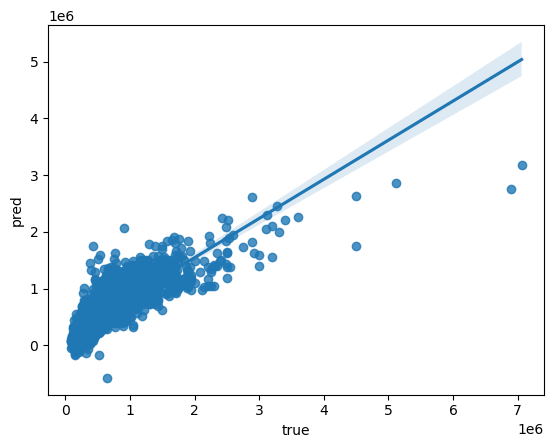

In [55]:
sns.regplot(results['true'], results['pred'])

#### A function that takes a list of models and train tests

In [56]:
def train_test_models(models, X, y, test_size=0.3, random_state=42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize an empty dictionary to store the evaluation metrics for each model
    eval_dict = {}

    # Loop through the list of models
    for model in models:
        # Train the model on the training set
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate the evaluation metrics for the model
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)

        # Calculate the number of independent variables
        p = X.shape[1]

        # Calculate the adjusted R-squared
        n = X_test.shape[0]
        adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

        # Add the evaluation metrics to the dictionary
        eval_dict[type(model).__name__] = {'R-squared': r2, 'Adjusted R-squared': adj_r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae}

    return eval_dict

In [57]:
# Create a list of regression models to train and test
models = [LinearRegression(), KNeighborsRegressor(n_neighbors=9,p=1), MLPRegressor(random_state=42), Lasso(), Ridge(), ElasticNet(), BayesianRidge(), RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)]

# Call the train_test_models function with the models list and your data
eval_dict = train_test_models(models, X, y, test_size=0.3, random_state=42)

# Print the evaluation metrics for each model
for model_name, metrics in eval_dict.items():
    print(f"{model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value}")

LinearRegression:
  R-squared: 0.6870366936039973
  Adjusted R-squared: 0.686019005552849
  MSE: 41498454318.309296
  RMSE: 203711.69411280565
  MAE: 125412.08395538814
KNeighborsRegressor:
  R-squared: 0.5119499687133082
  Adjusted R-squared: 0.5103629370228435
  MSE: 64714685442.30236
  RMSE: 254390.812417238
  MAE: 149434.1286351166
MLPRegressor:
  R-squared: 0.5453261216350058
  Adjusted R-squared: 0.5438476218756895
  MSE: 60289058766.47278
  RMSE: 245538.30407183475
  MAE: 159683.4167761832
Lasso:
  R-squared: 0.6870372045289574
  Adjusted R-squared: 0.686019518139225
  MSE: 41498386570.44339
  RMSE: 203711.52782904406
  MAE: 125410.95063134826
Ridge:
  R-squared: 0.6870348905965684
  Adjusted R-squared: 0.6860171966824352
  MSE: 41498693394.32843
  RMSE: 203712.28091189894
  MAE: 125392.44316584345
ElasticNet:
  R-squared: 0.6083315572798552
  Adjusted R-squared: 0.6070579373824996
  MSE: 51934634655.15353
  RMSE: 227891.71695161174
  MAE: 144564.89512589027
BayesianRidge:
  R-s

#### Let's try to find the best K value from a pre-defined set of values.

In [58]:
scores = [] # We will store here the R2 values for each of our K-NN models with different K-values.
for i in range(2,13): # The values of K
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

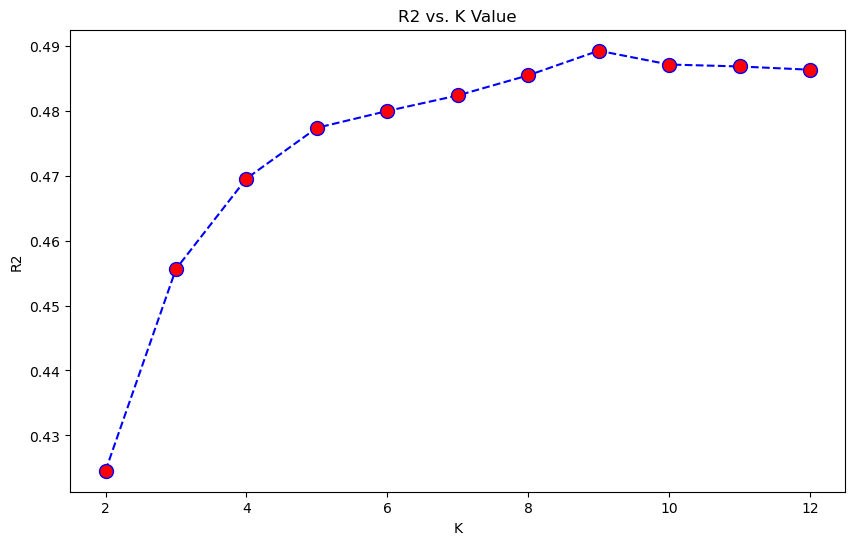

In [59]:
plt.figure(figsize=(10,6))
plt.plot(range(2,13), scores, color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')
plt.show()

#### The best K value is 9, let´s run the model again

In [60]:
# Create a list of regression models to train and test
models = [LinearRegression(), KNeighborsRegressor(n_neighbors=9,p=1), MLPRegressor(random_state=42), Lasso(), Ridge(), ElasticNet(), BayesianRidge(), RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)]

# Call the train_test_models function with the models list and your data
eval_dict = train_test_models(models, X, y, test_size=0.3, random_state=42)

# Print the evaluation metrics for each model
for model_name, metrics in eval_dict.items():
    print(f"{model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value}")

LinearRegression:
  R-squared: 0.6870366936039973
  Adjusted R-squared: 0.686019005552849
  MSE: 41498454318.309296
  RMSE: 203711.69411280565
  MAE: 125412.08395538814
KNeighborsRegressor:
  R-squared: 0.5119499687133082
  Adjusted R-squared: 0.5103629370228435
  MSE: 64714685442.30236
  RMSE: 254390.812417238
  MAE: 149434.1286351166
MLPRegressor:
  R-squared: 0.5453261216350058
  Adjusted R-squared: 0.5438476218756895
  MSE: 60289058766.47278
  RMSE: 245538.30407183475
  MAE: 159683.4167761832
Lasso:
  R-squared: 0.6870372045289574
  Adjusted R-squared: 0.686019518139225
  MSE: 41498386570.44339
  RMSE: 203711.52782904406
  MAE: 125410.95063134826
Ridge:
  R-squared: 0.6870348905965684
  Adjusted R-squared: 0.6860171966824352
  MSE: 41498693394.32843
  RMSE: 203712.28091189894
  MAE: 125392.44316584345
ElasticNet:
  R-squared: 0.6083315572798552
  Adjusted R-squared: 0.6070579373824996
  MSE: 51934634655.15353
  RMSE: 227891.71695161174
  MAE: 144564.89512589027
BayesianRidge:
  R-s

## 4 Cleaning the Data

In [61]:
# It is a good practice to set the ID as you data index.
# data.set_index("id", inplace=True)
# data

**<span style='color:Blue'> We added a new column called "renovated" with the info  '1' (renovated) and '0' (not renovated). If 'yr_renovated' is not neseccary anymore we should drop it (take a closer look at correlation)  </span>**

In [62]:
# Create a new column called "renovated" and set all values to 1
data['renovated'] = 1

# Change the values in "renovated" to 0 where "yr_renovated" is 0
data.loc[data['yr_renovated'] == 0, 'renovated'] = 0
data['renovated'].value_counts()

0    20683
1      914
Name: renovated, dtype: int64

#### Dealing with Nulls

In [63]:
# This function finds null values, empty strings and duplicated rows
def explore_data(data): 
    
    duplicate_rows = data.duplicated().sum() # check duplicated data (rows)
    nan_values = data.isna().sum() # check null
    empty_spaces = data.eq(' ').sum() # check whitespace/empty string
    
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f" Found {data.duplicated().sum()} duplicated rows.")
    return exploration

explore_data(data)

 Found 0 duplicated rows.


,NaN,EmptySpaces
bedrooms,0,0
bathrooms,0,0
sqft_living,0,0
sqft_lot,0,0
floors,0,0
waterfront,0,0
view,0,0
condition,0,0
grade,0,0
sqft_above,0,0


#### Move our target to the right

In [64]:
column_to_move = data['price']

# Drop the column from its original position
data = data.drop('price', axis=1)

# Insert the column at the desired position (e.g., after the second column)
desired_position = 22  # 0-indexed position
data.insert(desired_position, 'price', column_to_move)
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,date_month,date_weekday,renovated,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13,0,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9,1,538000
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25,0,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9,0,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18,0,510000


## 5 Exploratory Data Analysis

In [65]:
# generating EDA report
# eda_report = ProfileReport(data, title = "EDA Report")
# eda_report

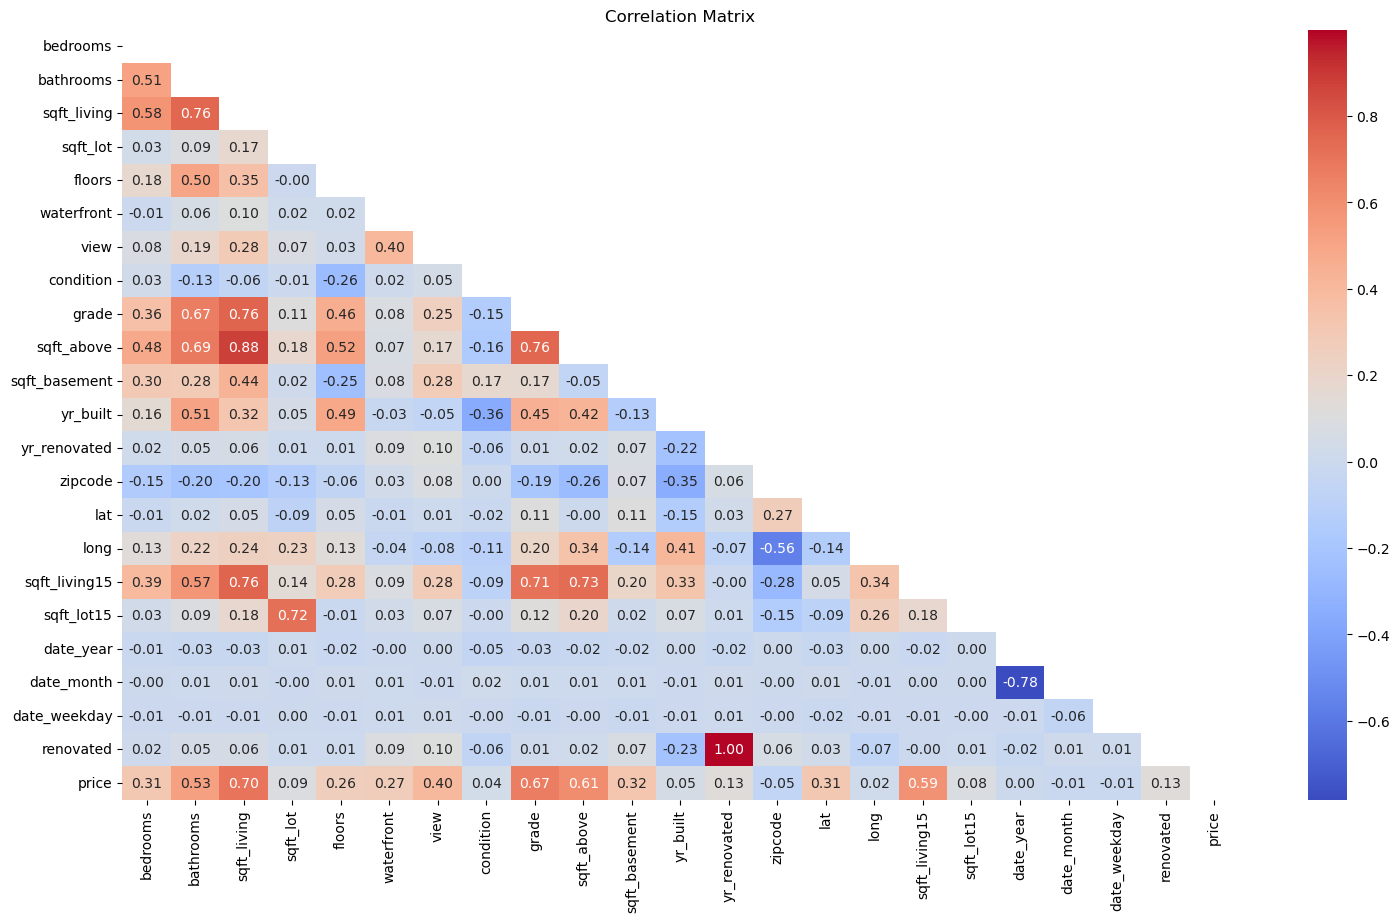

In [66]:
corr_matrix = data.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [67]:
corr_matrix = data.corr()[['price']].sort_values('price')

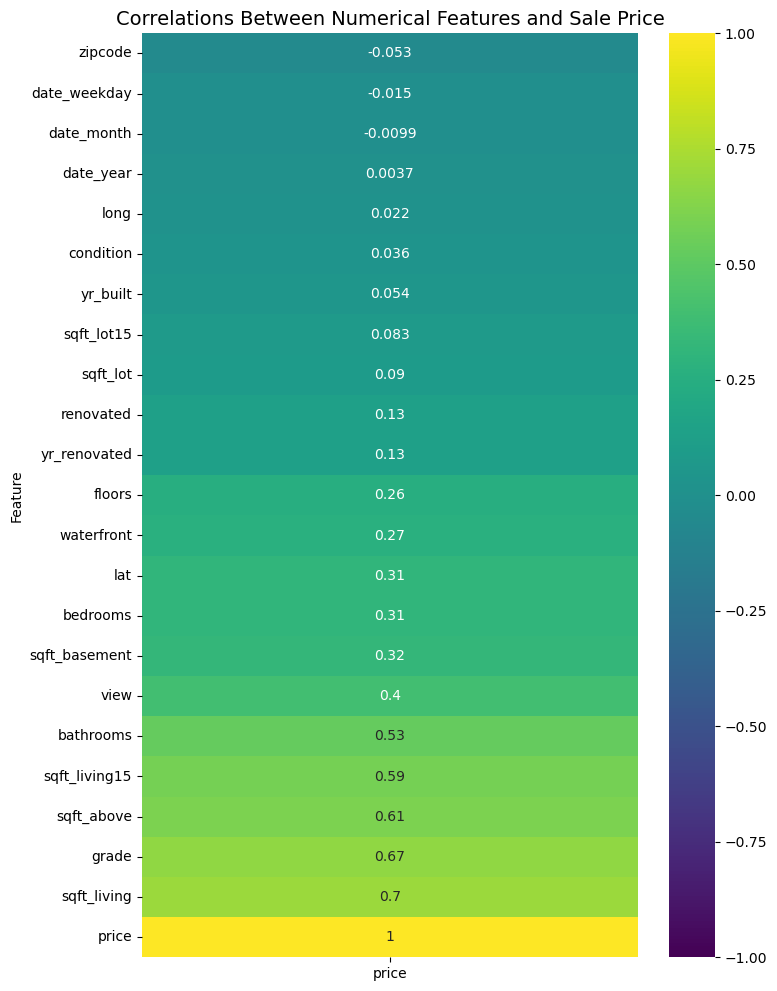

In [68]:
plt.figure(figsize=(8, 12))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = 'viridis')
plt.title('Correlations Between Numerical Features and Sale Price', fontdict={'fontsize':14})
plt.ylabel('Feature');

- **sqft_living** highly correlated with **bathrooms** (0.76), **grade** (0.76), **sqft_above** (0.88)
- **sqft_lot** higly correlated with **sqft_lot15** (0.72)
- **grade** higly correlated with **sqft_living15** (0.71) and **sqft_above** (0.76)
- **sqft_above** highly correlated with **sqft_living15** (0.73)
- **yr_renovated** highly correlated with **renovated** (1.00) which makes sense since renovated was build with the information from yr_renovated
- **date_year** highly correlated with **date_month** (-0.78)
- Our target **price** is highly correlated with **sqft_living** (0.70), **grade** (0.67), **sqft_above** (0.61) and **sqft_living15** (0.59) and medium correlated with **bathrooms** (0.53) and **view** (0.40)

We want to drop unnecessary variables like **zipcode**, since **lat** and **long** reflect the same information. We want to drop **yr_renovated** since we have the same information in **renovated**

In [69]:
data.drop(['yr_renovated','zipcode'], axis=1, inplace=True)

To avoid multicollinearity we may have to drop some highly correlated variables. Before deciding to get rid of them, we want to use the Variance Inflation Factor to quantify the extent of multicollinearity in a regression model.

In [70]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

Z = data[['sqft_living', 'sqft_above', 'sqft_living15', 'sqft_lot', 'sqft_lot15']]  # Select the predictor variables for VIF calculation

# Add a constant term to the predictor variables
Z = sm.add_constant(Z)

# Fit a linear regression model
model = sm.OLS(data['price'], Z)
results = model.fit()

# Calculate VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = Z.columns
vif["VIF"] = [variance_inflation_factor(Z.values, i) for i in range(Z.shape[1])]

vif

,Variable,VIF
0,const,9.424854
1,sqft_living,4.920643
2,sqft_above,4.549859
3,sqft_living15,2.466872
4,sqft_lot,2.078412
5,sqft_lot15,2.093833


- **sqft_living**: The predictor variable "sqft_living" has a VIF of 4.920643. This suggests a moderate level of correlation with the other predictor variables. It is generally acceptable, but further investigation may be needed to assess the impact of multicollinearity on the regression results.

- **sqft_above**: The predictor variable "sqft_above" has a VIF of 4.549859. Similar to "sqft_living," it indicates a moderate level of correlation with the other predictor variables. Again, additional examination is recommended to understand the influence of multicollinearity on the model.

- **sqft_living15**: The predictor variable "sqft_living15" has a VIF of 2.466872. This VIF suggests a relatively lower degree of correlation with the other predictors, indicating less multicollinearity compared to "sqft_living" and "sqft_above".

- **sqft_lot**: The predictor variable "sqft_lot" has a VIF of 2.078412, indicating a relatively low degree of correlation with the other predictors.

- **sqft_lot15**: The predictor variable "sqft_lot15" has a VIF of 2.093833, also indicating a relatively low degree of correlation with the other predictors.

For now we choose not to drop any other column

In [71]:
# data.drop(['sqft_lot', 'sqft_lot15', 'sqft_above', 'sqft_living15'], axis=1, inplace=True)

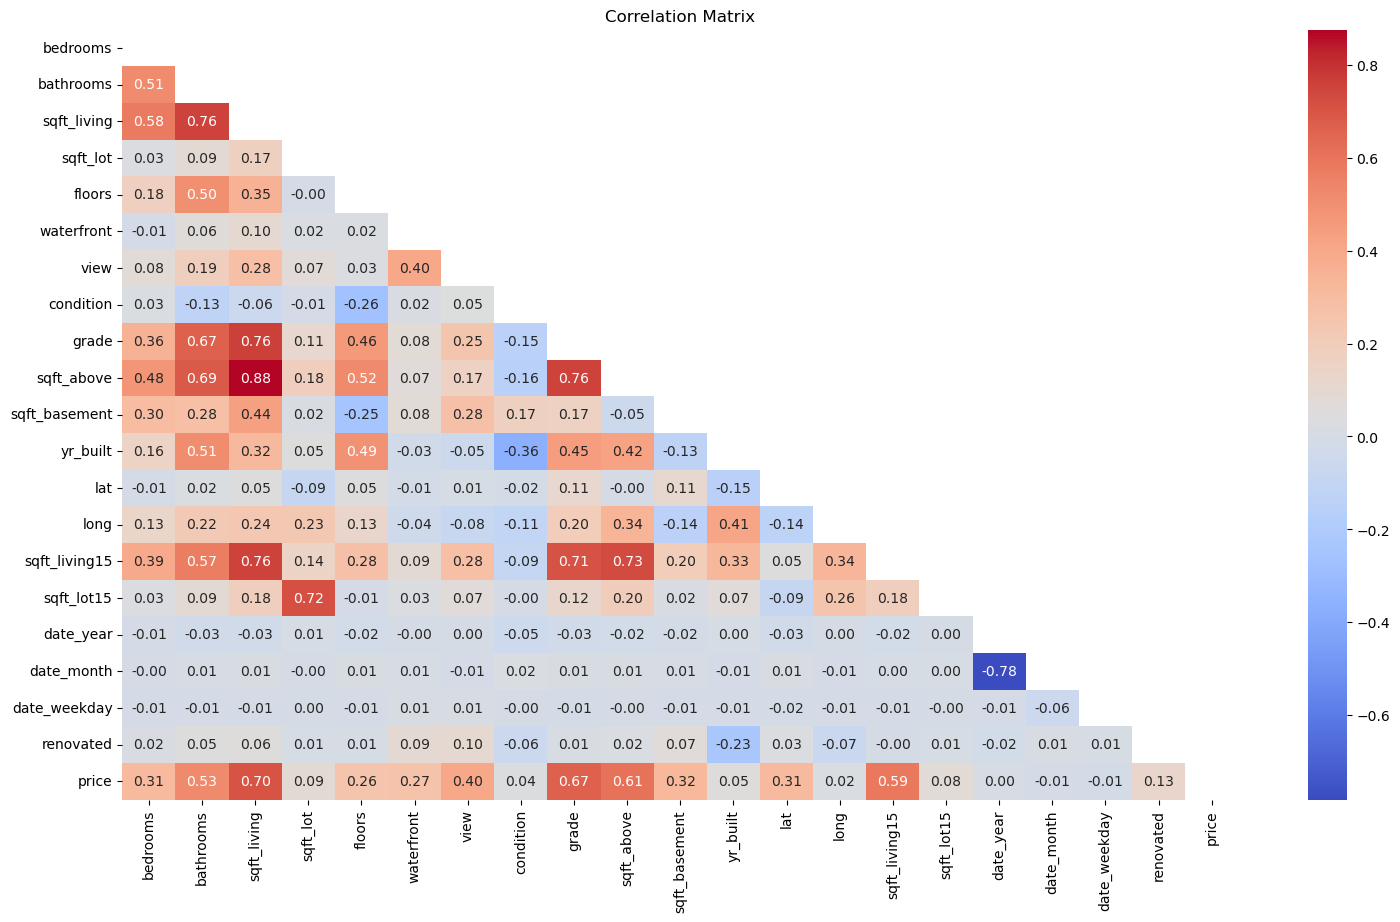

In [72]:
corr_matrix = data.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**<span style='color:Blue'> Dropping the columns improved the R2 of KNeighborsRegressor (0.26 to 0.55) and MLPRegressor (-0.69 to 0.52) model. Let´s move on and try to get rid of outliers.  </span>**

#### Looking at outliers

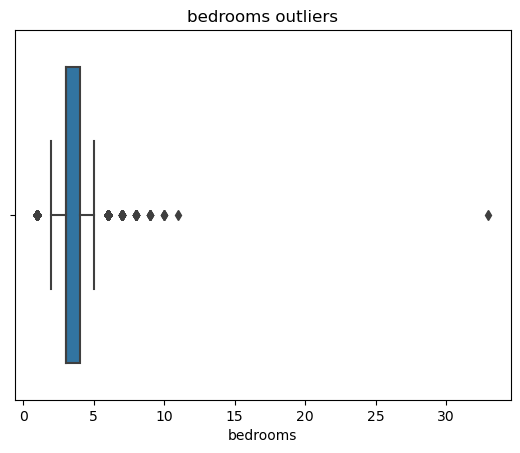

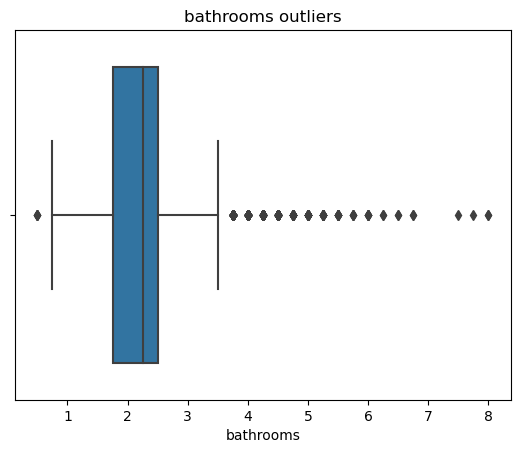

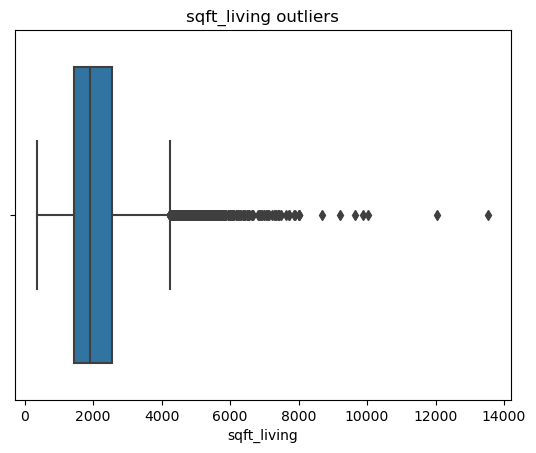

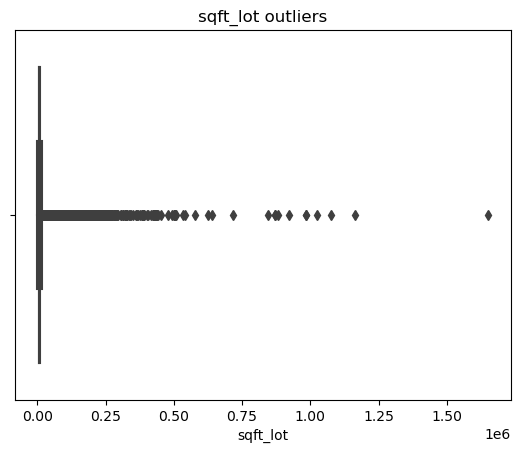

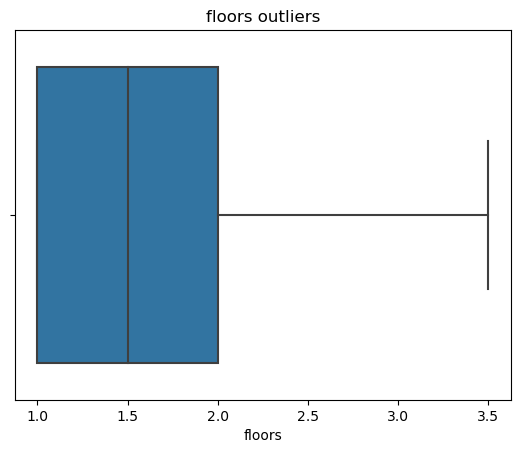

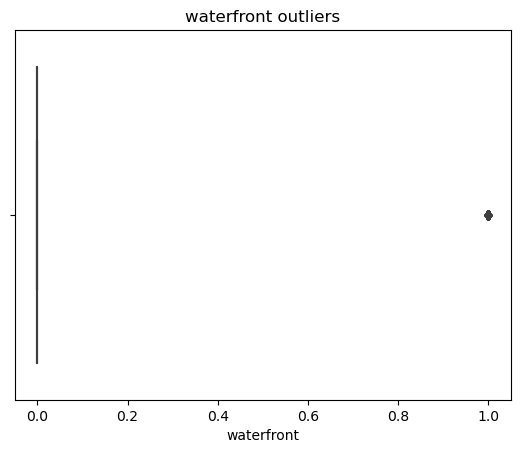

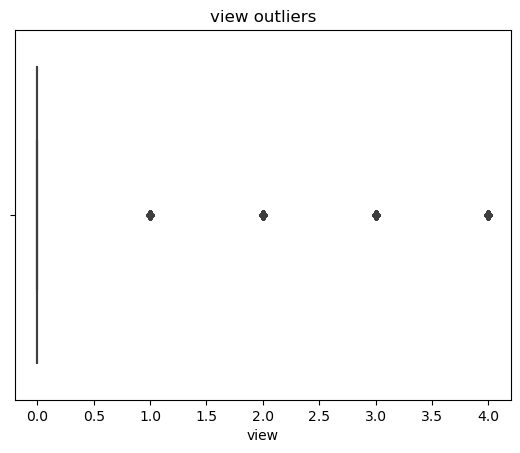

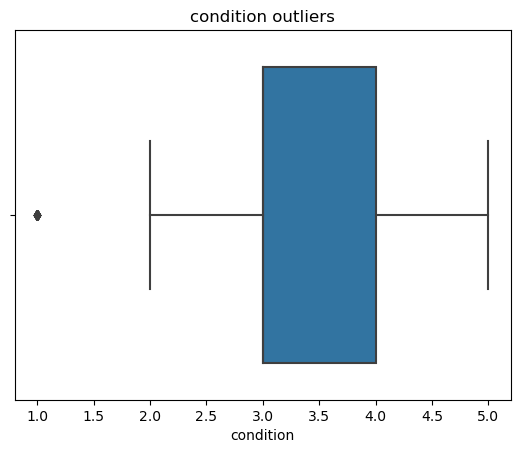

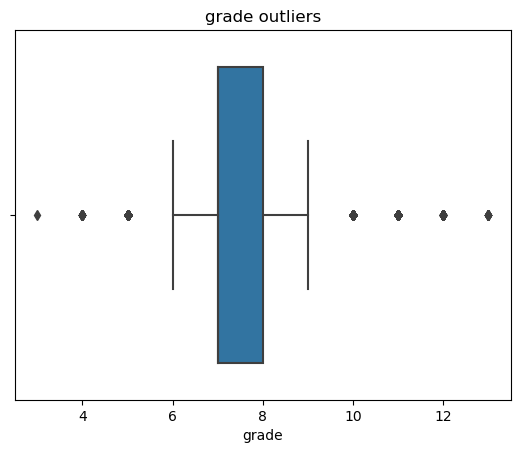

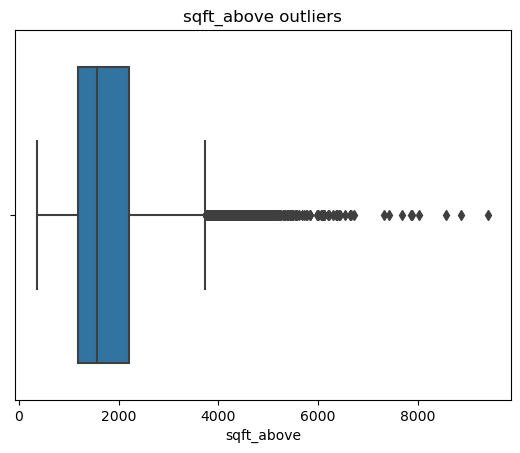

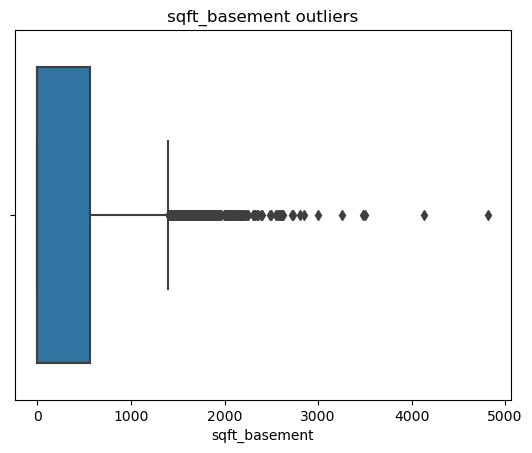

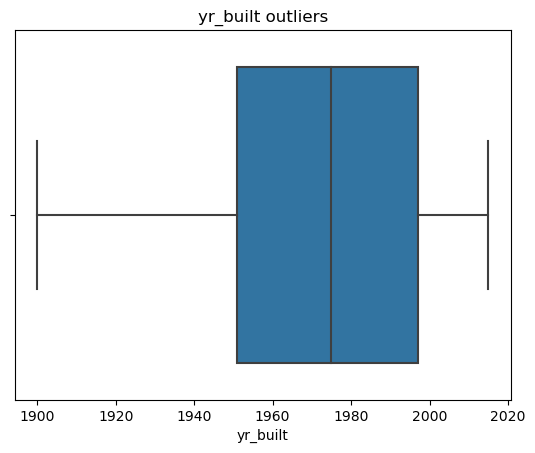

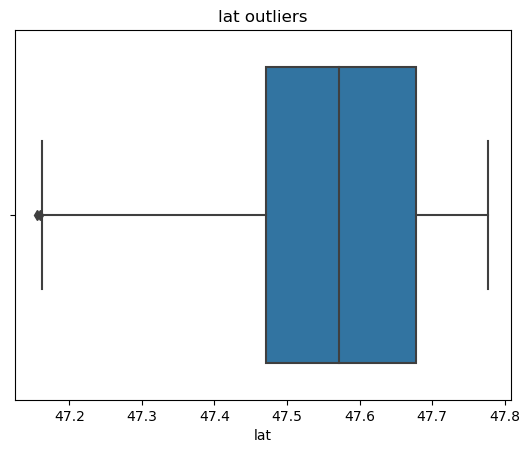

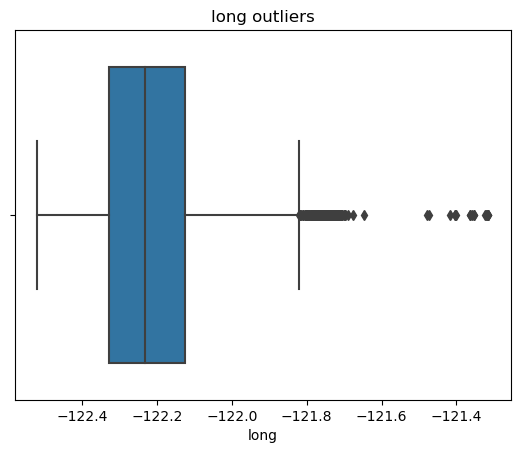

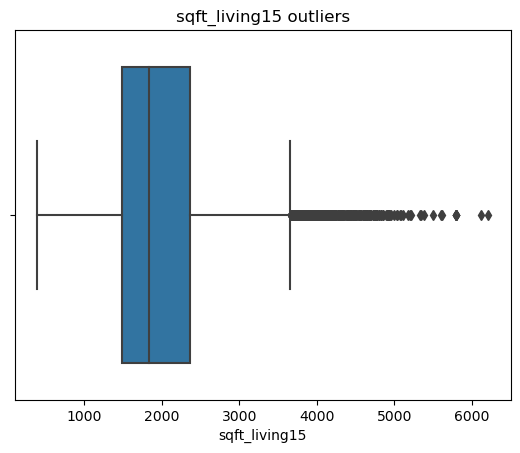

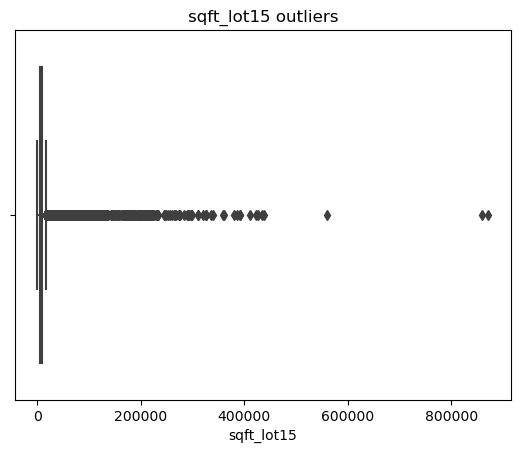

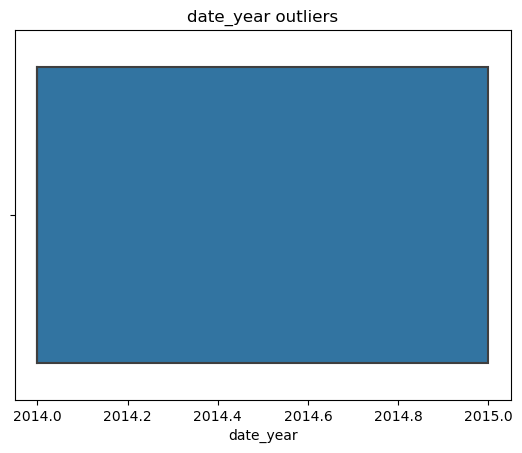

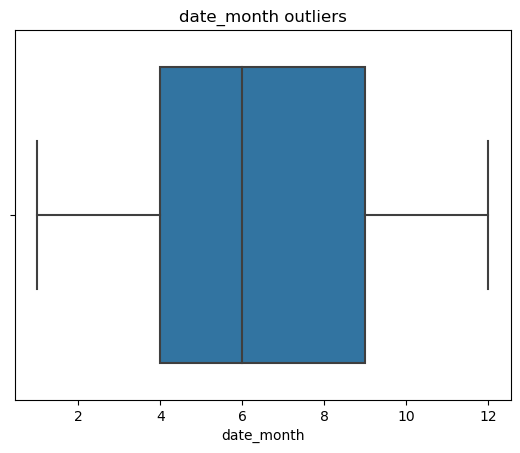

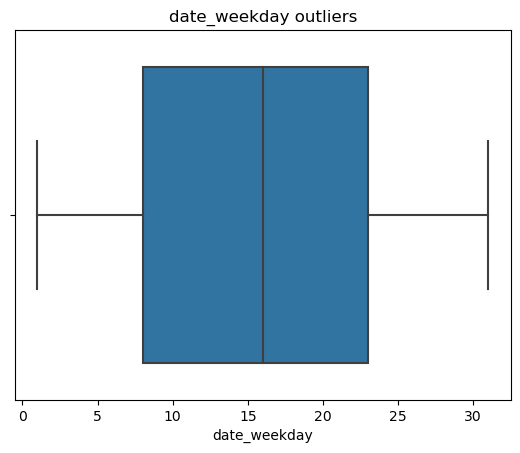

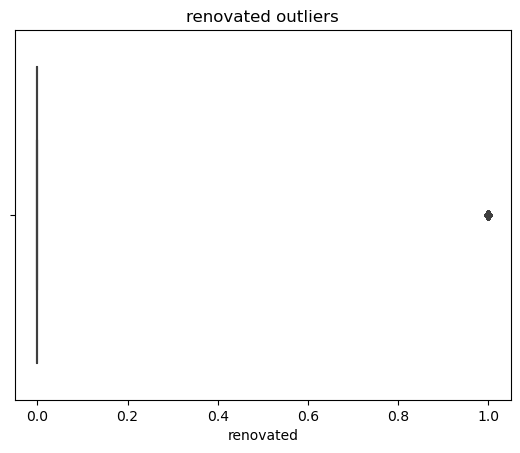

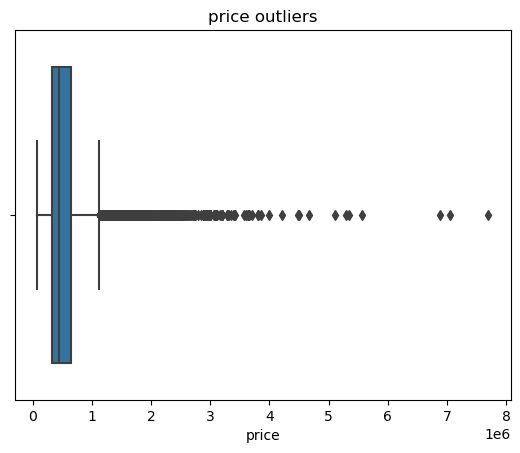

In [73]:
# Create a boxplot for each column in the dataframe
for col in data.columns:
    plt.figure()
    sns.boxplot(x=data[col], whis=1.5)
    plt.title(col + " outliers")

#### Removing outliers

In [74]:
# Bedrooms
# iqr = np.percentile(data['bedrooms'],75) - np.percentile(data['bedrooms'],25)
# upper_limit = np.percentile(data['bedrooms'],75) + 1.5*iqr
#lower_limit = np.percentile(data['bedrooms'],25) - 1.5*iqr
# data = data[(data['bedrooms']>lower_limit) & (data['bedrooms']<upper_limit)]

In [75]:
# Bathrooms
# iqr = np.percentile(data['bathrooms'],75) - np.percentile(data['bathrooms'],25)
#  upper_limit = np.percentile(data['bathrooms'],75) + 1.5*iqr
#  lower_limit = np.percentile(data['bathrooms'],25) - 1.5*iqr
#  data = data[(data['bathrooms']>lower_limit) & (data['bathrooms']<upper_limit)]

In [76]:
# sqft_living
# iqr = np.percentile(data['sqft_living'],75) - np.percentile(data['sqft_living'],25)
# upper_limit = np.percentile(data['sqft_living'],75) + 1.5*iqr
# lower_limit = np.percentile(data['sqft_living'],25) - 1.5*iqr
# data = data[(data['sqft_living']>lower_limit) & (data['sqft_living']<upper_limit)]

In [77]:
# sqft_basement
# iqr = np.percentile(data['sqft_basement'],75) - np.percentile(data['sqft_basement'],25)
# upper_limit = np.percentile(data['sqft_basement'],75) + 1.5*iqr
# lower_limit = np.percentile(data['sqft_basement'],25) - 1.5*iqr
# data = data[(data['sqft_basement']>lower_limit) & (data['sqft_basement']<upper_limit)]

In [78]:
data.shape

(21597, 21)

**<span style='color:Blue'> We lost some rows due to the removal of outliers (from 21,597 to 19,768). All our models have worsened --> LinearRegression (0.68 to 0.65),  KNeighborsRegressor (0.54 to 0.45) and MLPRegressor (0.52 to 0.38). We need to be more cautious what to remove and what not.  </span>**

**We reversed the removal of outliers**!

In [79]:
# Covariance visualization
# sns.pairplot(data)

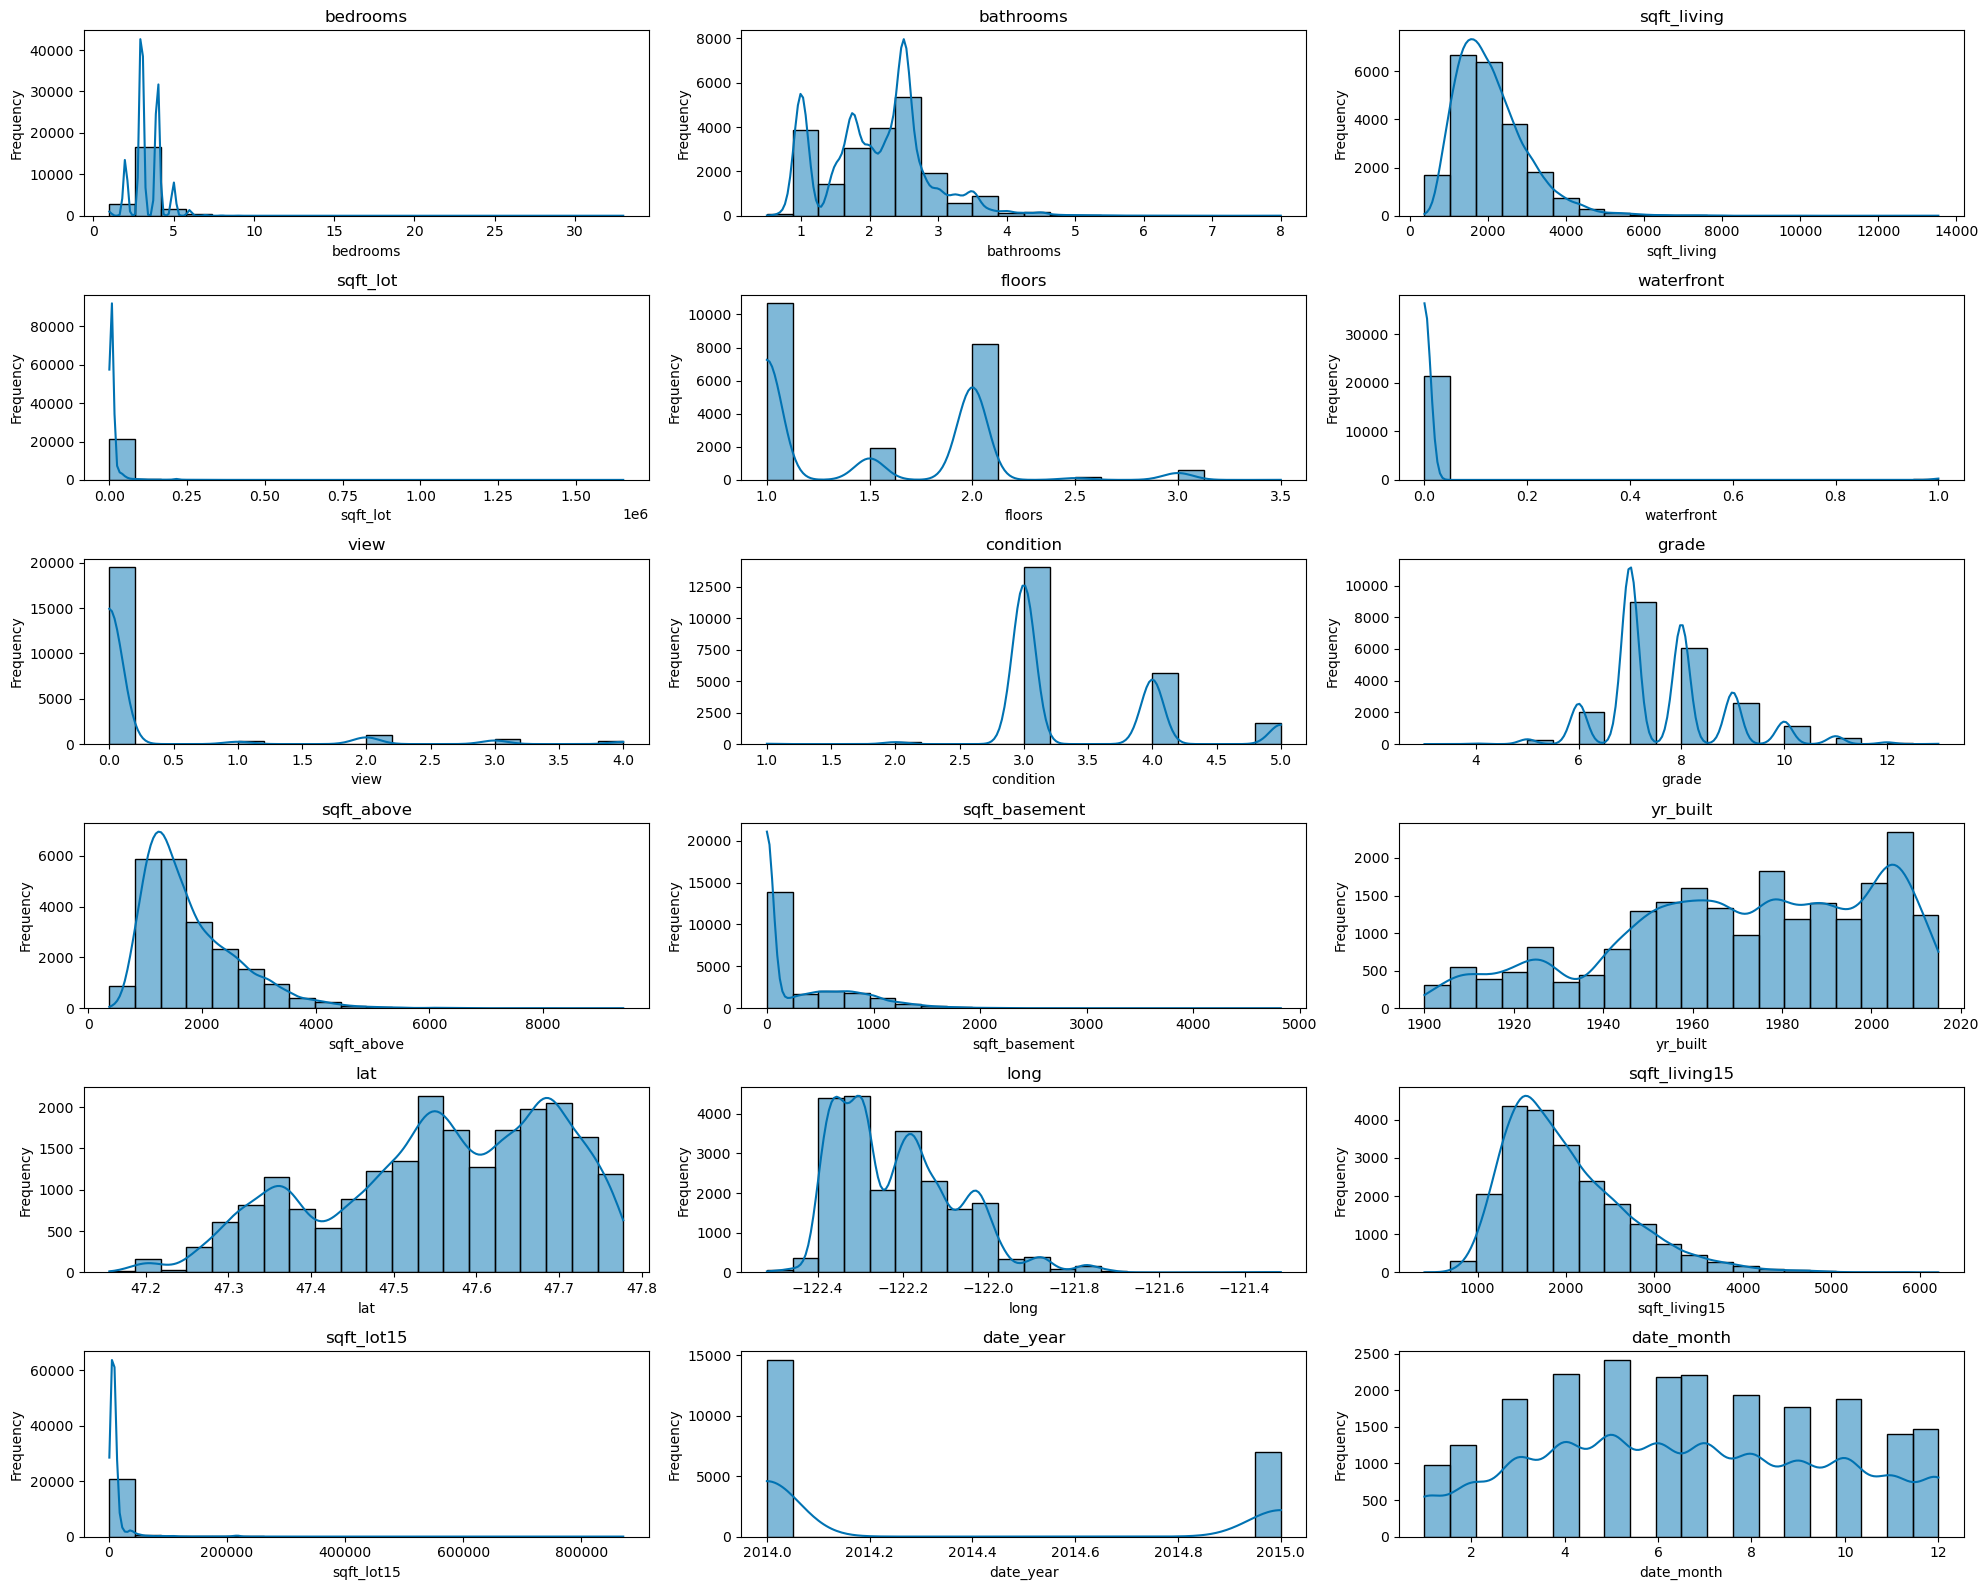

In [80]:
# Create a visualization of the features
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 16))
color = '#0072B2'  # blue

for i, ax in enumerate(axes.flat):
    if i >= len(data.columns):
        break
    sns.histplot(data=data, x=data.columns[i], color=color, bins=20, kde=True, ax=ax)
    ax.set_title(data.columns[i])
    ax.set_xlabel(data.columns[i])
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 6 Pre-Processing

### Feature Engineering

#### Bedrooms -- Dimensionality Reduction

In [81]:
#bins = [0, 2, 4, float('inf')]

# Create a new column with the binned values
#data['bedrooms_bin'] = pd.cut(data['bedrooms'], bins)

# Drop the original bedrooms column if desired
#data.drop('bedrooms', axis=1, inplace=True)

In [82]:
#print(data['bedrooms_bin'].head(5))

#### Grade - Ordinal

In [83]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize the OrdinalEncoder
#encoder = OrdinalEncoder(categories=[range(3, 14)])

# Fit and transform the "grade" column
#data["grade_ordinal"] = encoder.fit_transform(data[["grade"]])
#data.drop('grade', axis=1, inplace=True)
#data.rename(columns={'grade_ordinal': 'grade_ordinal'}, inplace=True)

In [84]:
#print(data['grade_ordinal'].head(5))

#### Bathrooms- Dimensionality Reduction

In [85]:
# Define the bins
#bins = [0, 1, 2.25, 3.25, 4.25, float('inf')]

# Create a new column with the binned values
#data['bathrooms_bin'] = pd.cut(data['bathrooms'], bins)

# Drop the original bathrooms column if desired
#data.drop('bathrooms', axis=1, inplace=True)

In [86]:
#print(data['bathrooms_bin'].head(5))

**View- Ordinal Encoding  - attempted but reliased it was unnecessary because the view variable is already in ordinal form(ie. 0=0 1=1 etc.)**

#### Condition - ordinal encoding

In [87]:
#data['condition'].unique()

In [88]:
# Define the encoder object
#encoder = OrdinalEncoder(categories=[['1', '2', '3', '4', '5']])

# Encode the condition column
#data['condition_ordinal'] = encoder.fit_transform(data[['condition']])

# Drop the original condition column and replace it with the encoded version
#data.drop('condition', axis=1, inplace=True)
#data.rename(columns={'condition_ordinal': 'condition_ordinal'}, inplace=True)

In [89]:
#data.head()

#### Converting datatypes of newly engineered features into int for scaling

In [90]:
#data['grade_ordinal'] = data['condition_ordinal'].astype(int)
#data['condition_ordinal'] = data['condition_ordinal'].astype(int)
#data['bathrooms_bin'] = data['bathrooms_bin'].cat.codes #converts intervals to numerical data
#data['bedrooms_bin'] = data['bedrooms_bin'].cat.codes

In [91]:
#data.info()

**<span style='color:Blue'>  We reversed the whole feature engineering part since all of our models got worse.  </span>**

#### Transformation

In [92]:
# Log Transformation
data["sqft_living_log"] = np.log((data.sqft_living))

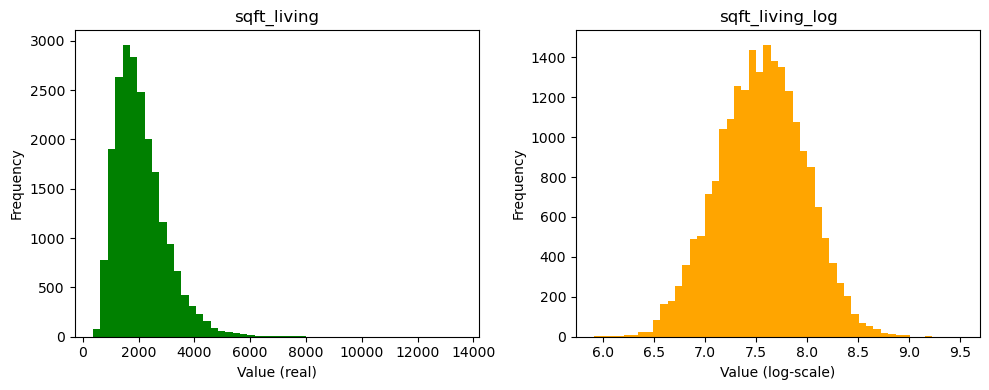

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the histogram for 'sqft_living'
axes[0].hist(data.sqft_living, bins=50, color='green')
axes[0].set_title('sqft_living')
axes[0].set_xlabel('Value (real)')
axes[0].set_ylabel('Frequency')

# Plot the histogram for 'sqft_living_log'
axes[1].hist(data.sqft_living_log, bins=50, color='orange')
axes[1].set_title('sqft_living_log')
axes[1].set_xlabel('Value (log-scale)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [94]:
# Log Transformation
data["sqft_above_log"] = np.log((data.sqft_above))

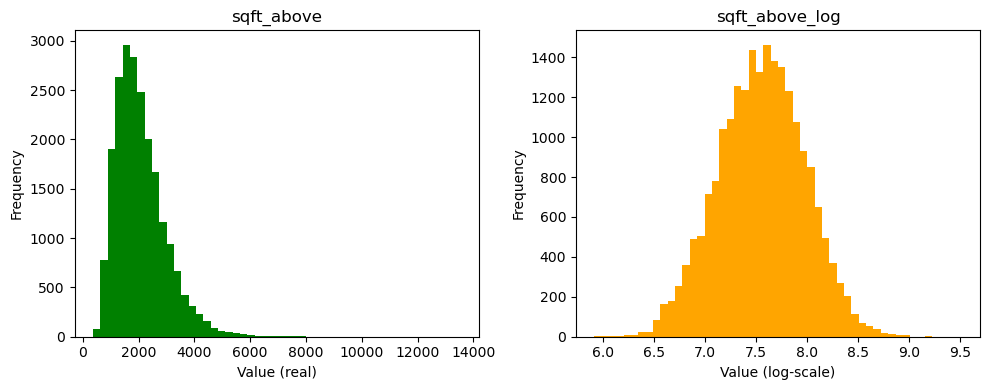

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the histogram for 'sqft_living'
axes[0].hist(data.sqft_living, bins=50, color='green')
axes[0].set_title('sqft_above')
axes[0].set_xlabel('Value (real)')
axes[0].set_ylabel('Frequency')

# Plot the histogram for 'sqft_living_log'
axes[1].hist(data.sqft_living_log, bins=50, color='orange')
axes[1].set_title('sqft_above_log')
axes[1].set_xlabel('Value (log-scale)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [96]:
# Log Transformation
data["sqft_living15_log"] = np.log((data.sqft_living15))

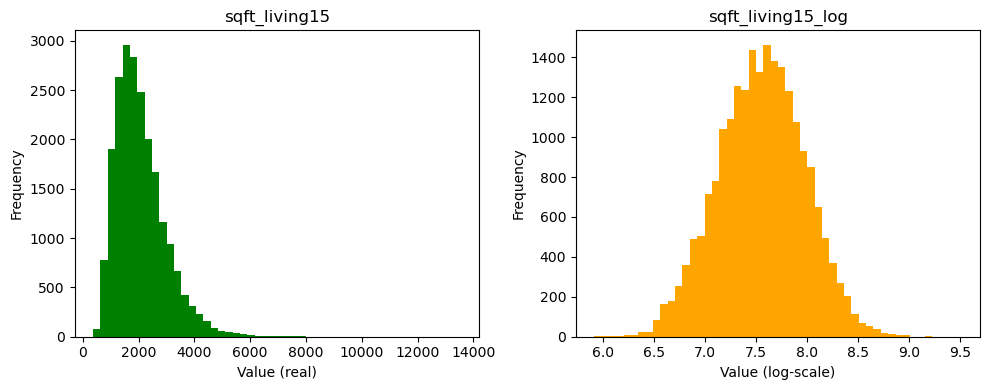

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the histogram for 'sqft_living'
axes[0].hist(data.sqft_living, bins=50, color='green')
axes[0].set_title('sqft_living15')
axes[0].set_xlabel('Value (real)')
axes[0].set_ylabel('Frequency')

# Plot the histogram for 'sqft_living_log'
axes[1].hist(data.sqft_living_log, bins=50, color='orange')
axes[1].set_title('sqft_living15_log')
axes[1].set_xlabel('Value (log-scale)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**<span style='color:Blue'>  We ran our model and see slight differences --> LinearRegression (0.68 to 0.71),  KNeighborsRegressor (0.54 to 0.50) and MLPRegressor (0.52 to 0.51).  </span>**

#### Scaling

In [98]:
# MinMax Scaler
# transformer = MinMaxScaler().fit(data)
# data_minmax = transformer.transform(data)
# data_norm = pd.DataFrame(data_minmax,columns=data.columns)
# data_norm.shape

In [99]:
# Standard Scaler
# transformer = StandardScaler().fit(data3)
# data_standardscaler = transformer.transform(data3)
# data_stand = pd.DataFrame(data_standardscaler,columns=data3.columns)
# data_stand.shape

## 7 Modelling

### X-Y Split

In [100]:
y = data['price']
X = data.drop(['price'], axis=1)

### Train-Test Split

In [101]:
# Separate training and testing datasets and correspondant targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [102]:
len(X_train)

15117

In [103]:
y_train

753       699800
1418     1700000
8178      258000
2254      245000
4063      373000
          ...   
11964     440000
21575     572000
5390      299800
860       245000
15795     545000
Name: price, Length: 15117, dtype: int64

In [104]:
model = LinearRegression() # We have the model
model.fit(X_train,y_train) # We fit the training data into the model

LinearRegression()

### Model Validation

In [105]:
predictions = model.predict(X_test)

In [106]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.7086091795264904, 196565.44909734407, 38637975778.84056)

r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("R2 = ", r2)
print("RMSE = ", RMSE)
print("The value of the metric MSE is ", MSE)
print("MAE = ", MAE)

#### Present results

In [107]:
results = pd.DataFrame()
results['true'] = y_test
results['pred'] = predictions
results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,diff
3686,132500,204922.143200,72422.143200
10247,415000,327476.214980,87523.785020
4037,494000,247594.669323,246405.330677
3437,355000,318219.286784,36780.713216
19291,606000,371661.206088,234338.793912
...,...,...,...
9400,1010000,732650.641598,277349.358402
9092,675000,965923.341831,290923.341831
6650,442500,358864.492757,83635.507243
21095,424950,555646.013244,130696.013244


In [108]:
results.sort_values('diff', ascending=True).head(10)

,true,pred,diff
5348,364250,364268.681528,18.681528
11244,199950,199990.588116,40.588116
15527,482500,482551.685413,51.685413
15128,289000,289066.048529,66.048529
19500,480000,480089.722848,89.722848
16075,665000,664860.862457,139.137543
5687,309950,310090.275538,140.275538
6595,290000,289850.767247,149.232753
9639,359950,360120.722317,170.722317
369,338000,337812.793681,187.206319


<AxesSubplot:xlabel='true', ylabel='pred'>

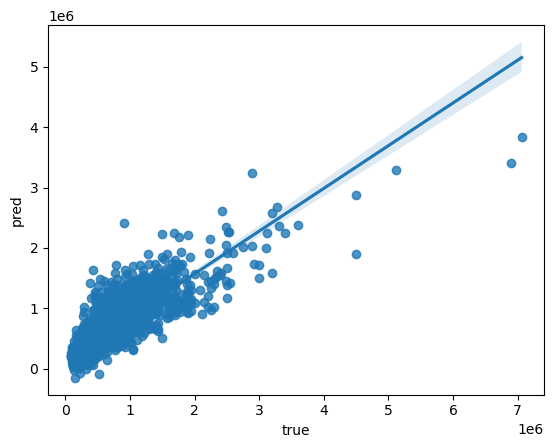

In [109]:
sns.regplot(results['true'], results['pred'])

In [110]:
# Create a list of regression models to train and test
models = [LinearRegression(), KNeighborsRegressor(n_neighbors=16,p=1), MLPRegressor(random_state=42), Lasso(), Ridge(), ElasticNet(), BayesianRidge(), RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)]

# Call the train_test_models function with the models list and your data
eval_dict = train_test_models(models, X, y, test_size=0.3, random_state=42)

# Print the evaluation metrics for each model
for model_name, metrics in eval_dict.items():
    print(f"{model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value}")

LinearRegression:
  R-squared: 0.7086091795264904
  Adjusted R-squared: 0.7075710771611108
  MSE: 38637975778.84056
  RMSE: 196565.44909734407
  MAE: 122050.3923294783
KNeighborsRegressor:
  R-squared: 0.5039038266368168
  Adjusted R-squared: 0.5021364455978835
  MSE: 65781591538.243866
  RMSE: 256479.2224298956
  MAE: 151059.24586226852
MLPRegressor:
  R-squared: 0.5138175904732178
  Adjusted R-squared: 0.5120855279857464
  MSE: 64467041662.01388
  RMSE: 253903.60702836397
  MAE: 164835.626445298
Lasso:
  R-squared: 0.70861619802203
  Adjusted R-squared: 0.7075781206605843
  MSE: 38637045137.09891
  RMSE: 196563.0818264175
  MAE: 122047.90784710195
Ridge:
  R-squared: 0.7086919357024013
  Adjusted R-squared: 0.7076541281623077
  MSE: 38627002436.86911
  RMSE: 196537.53442248408
  MAE: 121994.64066242009
ElasticNet:
  R-squared: 0.6109024074569938
  Adjusted R-squared: 0.6095162171489874
  MSE: 51593743865.54702
  RMSE: 227142.56286646723
  MAE: 144098.10687413238
BayesianRidge:
  R-sq

#### Let's try to find the best K value from a pre-defined set of values.

In [111]:
scores = [] # We will store here the R2 values for each of our K-NN models with different K-values.
for i in range(2,13): # The values of K
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

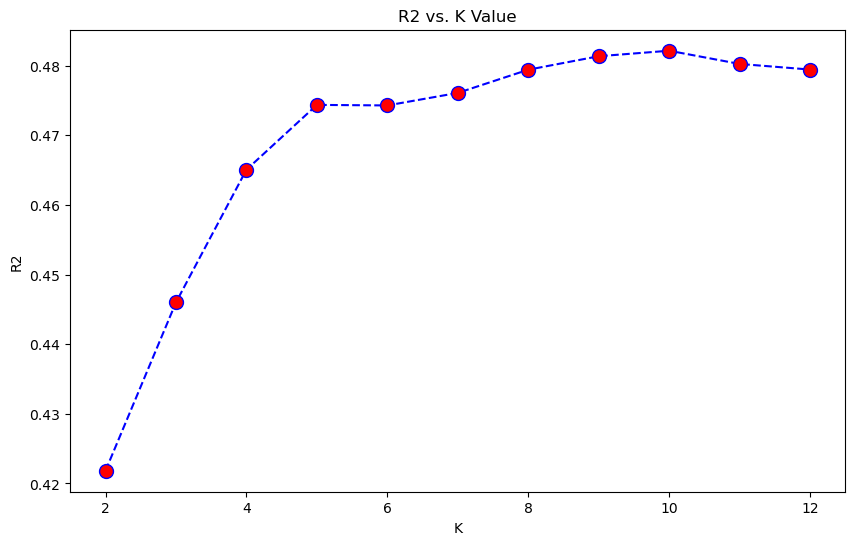

In [112]:
plt.figure(figsize=(10,6))
plt.plot(range(2,13), scores, color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')
plt.show()

#### The best K value is 10, let´s run the model again

In [113]:
# Create a list of regression models to train and test
models = [LinearRegression(), KNeighborsRegressor(n_neighbors=10,p=1), MLPRegressor(random_state=42), Lasso(), Ridge(), ElasticNet(), BayesianRidge(), RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)]

# Call the train_test_models function with the models list and your data
eval_dict = train_test_models(models, X, y, test_size=0.3, random_state=42)

# Print the evaluation metrics for each model
for model_name, metrics in eval_dict.items():
    print(f"{model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value}")

LinearRegression:
  R-squared: 0.7086091795264904
  Adjusted R-squared: 0.7075710771611108
  MSE: 38637975778.84056
  RMSE: 196565.44909734407
  MAE: 122050.3923294783
KNeighborsRegressor:
  R-squared: 0.4988342455614856
  Adjusted R-squared: 0.49704880374734595
  MSE: 66453810211.70521
  RMSE: 257786.36544958153
  MAE: 152036.8523148148
MLPRegressor:
  R-squared: 0.5138175904732178
  Adjusted R-squared: 0.5120855279857464
  MSE: 64467041662.01388
  RMSE: 253903.60702836397
  MAE: 164835.626445298
Lasso:
  R-squared: 0.70861619802203
  Adjusted R-squared: 0.7075781206605843
  MSE: 38637045137.09891
  RMSE: 196563.0818264175
  MAE: 122047.90784710195
Ridge:
  R-squared: 0.7086919357024013
  Adjusted R-squared: 0.7076541281623077
  MSE: 38627002436.86911
  RMSE: 196537.53442248408
  MAE: 121994.64066242009
ElasticNet:
  R-squared: 0.6109024074569938
  Adjusted R-squared: 0.6095162171489874
  MSE: 51593743865.54702
  RMSE: 227142.56286646723
  MAE: 144098.10687413238
BayesianRidge:
  R-sq

#### Advanced Finetuning

#### Hyperparameter Tuning

**Hyperparameter tuning via GridSearchCv to automate the process of finding the best the parameter values for all listed models -- It takes a while to run!**

In [114]:
# Define the hyperparameters and their range for each model
params = {
    'LinearRegression': {},
    'KNeighborsRegressor': {'n_neighbors': [5, 10, 15], 'p': [1, 2]},
    'MLPRegressor': {'hidden_layer_sizes': [(50,), (100,), (50,50), (100,100)], 'activation': ['relu', 'logistic']},
    'Lasso': {'alpha': [0.001, 0.01, 0.1, 1]},
    'Ridge': {'alpha': [0.001, 0.01, 0.1, 1]},
    'ElasticNet': {'alpha': [0.001, 0.01, 0.1, 1], 'l1_ratio': [0.25, 0.5, 0.75]},
    'BayesianRidge': {},
    'RandomForestRegressor': {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15]}
}

# Create an empty dictionary to store the best models
best_models = {}

# Loop over the models and their hyperparameters
for model in models:
    model_name = type(model).__name__
    print(f"Performing GridSearchCV for {model_name}...")
    grid = GridSearchCV(model, params[model_name], scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    grid.fit(X, y)
    best_models[model_name] = grid.best_estimator_
    print(f"Best hyperparameters for {model_name}: {grid.best_params_}")

# Call the train_test_models function with the best models
eval_dict = train_test_models(best_models.values(), X, y, test_size=0.3, random_state=42)

# Print the evaluation metrics for each model
for model_name, metrics in eval_dict.items():
    print(f"{model_name}:")
    for metric_name, metric_value in metrics.items():
        if metric_name == 'r2_score':
            adjusted_r2 = 1 - (1 - metric_value) * ((X.shape[0] - 1) / (X.shape[0] - X.shape[1] - 1))
            print(f"  Adjusted R-squared: {adjusted_r2}")
        print(f"  {metric_name}: {metric_value}")

Performing GridSearchCV for LinearRegression...
Best hyperparameters for LinearRegression: {}
Performing GridSearchCV for KNeighborsRegressor...
Best hyperparameters for KNeighborsRegressor: {'n_neighbors': 5, 'p': 1}
Performing GridSearchCV for MLPRegressor...
Best hyperparameters for MLPRegressor: {'activation': 'relu', 'hidden_layer_sizes': (100, 100)}
Performing GridSearchCV for Lasso...
Best hyperparameters for Lasso: {'alpha': 1}
Performing GridSearchCV for Ridge...
Best hyperparameters for Ridge: {'alpha': 1}
Performing GridSearchCV for ElasticNet...
Best hyperparameters for ElasticNet: {'alpha': 0.001, 'l1_ratio': 0.75}
Performing GridSearchCV for BayesianRidge...
Best hyperparameters for BayesianRidge: {}
Performing GridSearchCV for RandomForestRegressor...
Best hyperparameters for RandomForestRegressor: {'max_depth': 15, 'n_estimators': 100}
LinearRegression:
  R-squared: 0.7086091795264904
  Adjusted R-squared: 0.7075710771611108
  MSE: 38637975778.84056
  RMSE: 196565.44909

**The RandomForestRegressor remains as the best model of all, and the best hyperparameters are:{'max_depth': 15, 'n_estimators': 100}.**

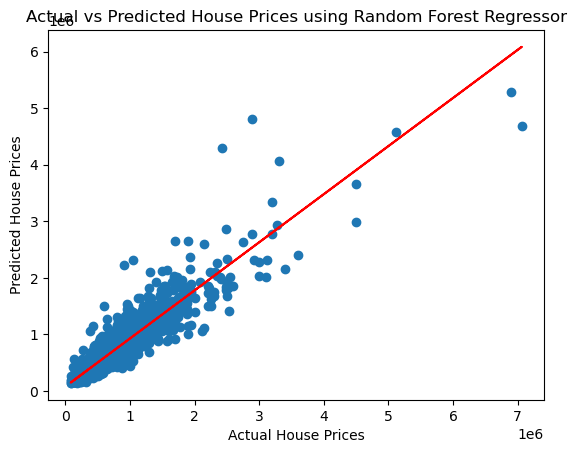

In [115]:
#Visualisation of actual vs predicted values using Random Forest Regressor

rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data using the trained model
y_pred = rf_regressor.predict(X_test)

# Linear Regression Line
p = np.polyfit(y_test, y_pred, 1)
line = p[0] * y_test + p[1]

# Visualize the actual vs predicted values using a scatter plot
plt.scatter(y_test, y_pred)
plt.plot(y_test, line, color='red')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices using Random Forest Regressor")
plt.show()



#### Ensemble Learning Models - Stacking Regressor

**StackingRegressor, like RandomForestRegressor, is an ensemble learning technique that combines multiple regression models to improve prediction accuracy and reduce overfitting. Unlike RandomForestRegressow, however, it combines the prediuctions of a range of models rather than rely on one singular algorithm. In our code, we have also included RandomForestRegressor as one of the models that Stacking Regressor would base it's predictions upon. As observed below, Stacking Regressor yields similar performance metrics to RandomForestRegressor, although the latter still outperforms slightly. This means the RandomForestRegressor has lower prediction errors on average.**

In [116]:
from sklearn.ensemble import StackingRegressor #importing the required library

In [117]:
# Create a list of regression models to use in the first layer of the stack
base_models = [KNeighborsRegressor(n_neighbors=10,p=1), MLPRegressor(random_state=42), Lasso(), Ridge(), ElasticNet(), BayesianRidge(), RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)]

# Create the stack by combining the base models with a meta-model (in this case, a linear regression)
stack = StackingRegressor(estimators=[(str(i), model) for i, model in enumerate(base_models)], final_estimator=LinearRegression())

# Train and test the stack using your data
eval_dict = train_test_models([stack], X, y, test_size=0.3, random_state=42)

# Print the evaluation metrics for the stack
for model_name, metrics in eval_dict.items():
    print(f"{model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value}")

StackingRegressor:
  R-squared: 0.863461612535585
  Adjusted R-squared: 0.8629751839557086
  MSE: 18104780717.385777
  RMSE: 134554.00669391372
  MAE: 76277.79261004881


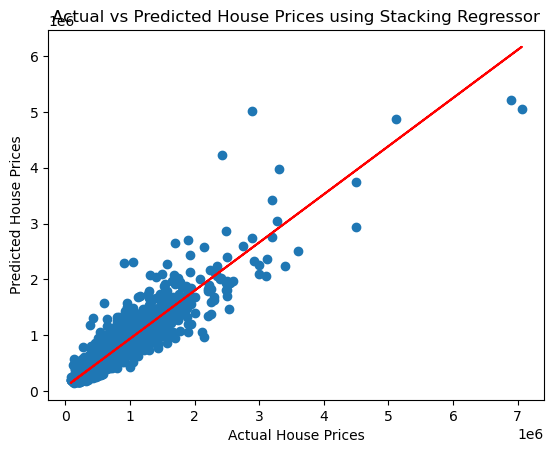

In [118]:
#Visualisation of actual vs predicted values using Stacking Regressor
stack.fit(X_train, y_train)

# Make predictions on the test data using the trained model
y_pred = stack.predict(X_test)

# Linear Regression Line
p = np.polyfit(y_test, y_pred, 1)
line = p[0] * y_test + p[1]

# Visualize the actual vs predicted values using a scatter plot
plt.scatter(y_test, y_pred)
plt.plot(y_test, line, color='red')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices using Stacking Regressor")
plt.show()


#### Weighted Ensemble Model

**We theorized that the weighted ensemble model may produce better results. This is because there are more cheap houses (16,392 houses costing less than $650,000 in price) and less expensive houses (5,205 houses costing more than $650,000 in price). However, the performance metrics of the Weighted Ensemble model do not outperform those of the Random Forest/ Decision Tree model, as demonstrated below:**

In [119]:
models = [LinearRegression(), KNeighborsRegressor(n_neighbors=10, p=1), MLPRegressor(random_state=42), Lasso(), Ridge(), ElasticNet(), BayesianRidge(), RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)]

# Train and test the models
r2_scores = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

# Compute the weights for each model based on its R-squared score
weights = [score / sum(r2_scores) for score in r2_scores]

# Compute the weighted average of the predicted values
y_pred_weighted_avg = None
for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    if y_pred_weighted_avg is None:
        y_pred_weighted_avg = y_pred * weights[i]
    else:
        y_pred_weighted_avg += y_pred * weights[i]

# Evaluate the performance of the weighted average model
r2_weighted_avg = r2_score(y_test, y_pred_weighted_avg)
n = X_test.shape[0]
p = len(models)
adj_r2_weighted_avg = 1 - ((1 - r2_weighted_avg) * (n - 1)) / (n - p - 1)
mse_weighted_avg = mean_squared_error(y_test, y_pred_weighted_avg)
rmse_weighted_avg = np.sqrt(mse_weighted_avg)
mae_weighted_avg = mean_absolute_error(y_test, y_pred_weighted_avg)

print(f"Weighted Average Model:")
print(f"  R-squared: {r2_weighted_avg}")
print(f"  Adjusted R-squared: {adj_r2_weighted_avg}")
print(f"  MSE: {mse_weighted_avg}")
print(f"  RMSE: {rmse_weighted_avg}")
print(f"  MAE: {mae_weighted_avg}")

Weighted Average Model:
  R-squared: 0.7462637448617633
  Adjusted R-squared: 0.7459500545447943
  MSE: 33645038180.384846
  RMSE: 183425.83836631317
  MAE: 107849.69894040565


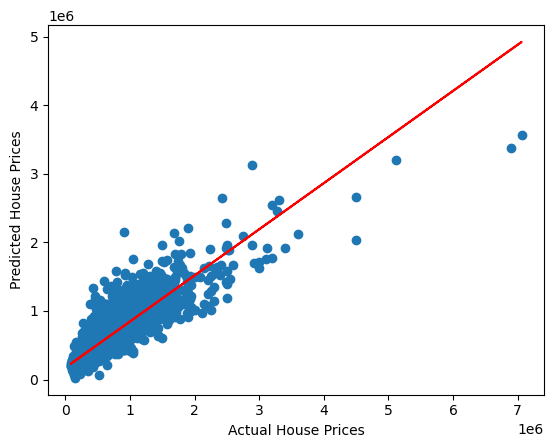

In [120]:
# Visualize the actual vs predicted values using a scatter plot
plt.scatter(y_test, y_pred_weighted_avg)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")

# Add a regression line
regression_line = LinearRegression()
regression_line.fit(y_test.values.reshape(-1, 1), y_pred_weighted_avg)
plt.plot(y_test, regression_line.predict(y_test.values.reshape(-1, 1)), color='red')

plt.show()

#### Applying the model to our fictious porperty

In [121]:
X_test.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,date_year,date_month,date_weekday,renovated,sqft_living_log,sqft_above_log,sqft_living15_log
3686,3,0.75,850,8573,1.0,0,0,3,6,600,250,1945,47.503,-122.356,850,8382,2015,2,20,0,6.745236,6.39693,6.745236


In [122]:
# Define your actual data here
data = [[3, 2, 850, 8573, 1, 1, 4, 4, 11, 600, 400, 2011, 47.612083, -122.2135, 850, 8382, 2015, 1, 17, 0, 6.745236, 6.39693, 6.745236]]

# Create a new DataFrame for the modified dataset
new_data = pd.DataFrame(data=data, columns=X_test.columns)
new_data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,date_year,date_month,date_weekday,renovated,sqft_living_log,sqft_above_log,sqft_living15_log
0,3,2,850,8573,1,1,4,4,11,600,400,2011,47.612083,-122.2135,850,8382,2015,1,17,0,6.745236,6.39693,6.745236


In [123]:
rf_regressor.predict(new_data)

array([1253259.05952381])

In [125]:
# Make predictions using the models

predictions = {}
models = [LinearRegression(), KNeighborsRegressor(n_neighbors=10,p=1), MLPRegressor(random_state=42), Lasso(), Ridge(), ElasticNet(), BayesianRidge(), RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)]

for model in models:
    model_name = type(model).__name__
    model.fit(X_train, y_train)
    model_predictions = model.predict(new_data)
    print(f"{model_name} predictions: {model_predictions}")

LinearRegression predictions: [1526815.84456147]
KNeighborsRegressor predictions: [223385.5]
MLPRegressor predictions: [184591.61390898]
Lasso predictions: [1493828.70105225]
Ridge predictions: [1522752.88400607]
ElasticNet predictions: [474809.55508597]
BayesianRidge predictions: [1523567.3387948]
RandomForestRegressor predictions: [1253259.05952381]


In [126]:
# Print the predictions for each model
for model_name, model_predictions in predictions.items():
    print(f"{model_name} predictions:")
    print(model_predictions)
    print()

## 8 Report

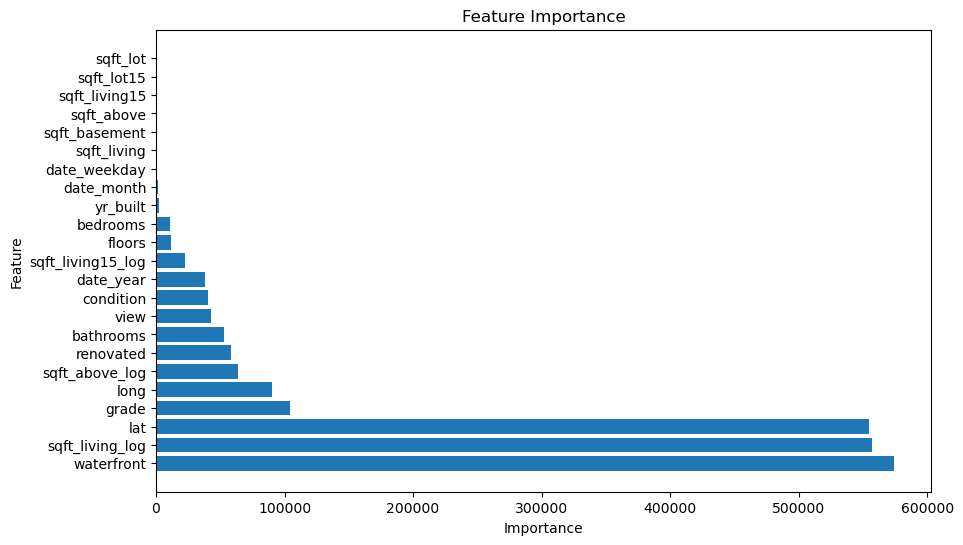

In [127]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate feature importance using the absolute value of the coefficients
importance = np.abs(model.coef_)

# Create a DataFrame to display the feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

**<span style='color:Blue'> Here one can see that having a waterfront massively influences the price of a house which makes sense.   </span>**

In [128]:
# Create a dictionary with the model names and their scores
model_data = {
    'Model': ['LinearRegression', 'KNeighborsRegressor', 'MLPRegressor', 'Lasso', 'Ridge', 'ElasticNet',
              'BayesianRidge', 'RandomForestRegressor'],
    'R-squared': [0.7086091795265244, 0.4988342455614856, 0.5995865679582557, 0.7086161980220302,
                  0.7086919357024009, 0.708854070235132, 0.7086764189099757, 0.8728925349279009],
    'Adjusted R-squared': [0.7075710771611449, 0.49704880374734595, 0.5981600640956535, 0.7075781206605846,
                           0.7076541281623072, 0.7078168403118681, 0.7076385560901073, 0.872439704739447],
    'MSE': [38637975778.836044, 66453810211.70521, 53094206823.710915, 38637045137.09889,
            38627002436.86917, 38605503646.55588, 38629059939.74081, 16854254875.925526],
    'RMSE': [196565.44909733257, 257786.36544958153, 230421.80197132152, 196563.08182641747,
             196537.53442248423, 196482.83295635748, 196542.76872920257, 129823.93799267347],
    'MAE': [122050.3923294726, 152036.8523148148, 149299.69343519423, 122047.90784710197,
            121994.64066242022, 121857.52073324363, 122005.5024723203, 69962.5308642647]
}

# Convert the dictionary to a pandas DataFrame
model_data = pd.DataFrame(model_data)

# Format the MSE column to display the whole number
pd.options.display.float_format = '{:.2f}'.format

model_data

,Model,R-squared,Adjusted R-squared,MSE,RMSE,MAE
0,LinearRegression,0.71,0.71,38637975778.84,196565.45,122050.39
1,KNeighborsRegressor,0.50,0.50,66453810211.71,257786.37,152036.85
2,MLPRegressor,0.60,0.60,53094206823.71,230421.80,149299.69
3,Lasso,0.71,0.71,38637045137.10,196563.08,122047.91
4,Ridge,0.71,0.71,38627002436.87,196537.53,121994.64
5,ElasticNet,0.71,0.71,38605503646.56,196482.83,121857.52
6,BayesianRidge,0.71,0.71,38629059939.74,196542.77,122005.50
7,RandomForestRegressor,0.87,0.87,16854254875.93,129823.94,69962.53


**<span style='color:Blue'> Our best models are the Random Forest and Stacking Regressor, both of which are Ensemble Learning Methods. It was very difficult to further improve the model but we tried our best to achieve at least minor improvements.   </span>**

## 9 Future Improvements 

Some things we would have done if we had more time
- Scaling part didnt work out well 
- Improving the RandomForestRegressor 
- Better techniques for removing the outliers (when tries for LinearRegression, KNN and MLPRegressor, it made the models worse. Would try for the other models as well)